In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [5]:
dataset = pd.read_csv('profanity_en.csv')

In [8]:
dataset.head()

,text,canonical_form_1,canonical_form_2,canonical_form_3,category_1,category_2,category_3,severity_rating,severity_description
0,69,69,NaN,NaN,sexual anatomy / sexual acts,NaN,NaN,1.0,Mild
1,@55,ass,NaN,NaN,sexual anatomy / sexual acts,NaN,NaN,1.0,Mild
2,@ssfcker,fuck,ass,NaN,sexual anatomy / sexual acts,sexual orientation / gender,NaN,2.8,Severe
3,@ssfucker,fuck,ass,NaN,sexual anatomy / sexual acts,sexual orientation / gender,NaN,2.8,Severe
4,@ssfvcker,fuck,ass,NaN,sexual anatomy / sexual acts,sexual orientation / gender,NaN,2.4,Strong


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  1598 non-null   object 
 1   canonical_form_1      1598 non-null   object 
 2   canonical_form_2      210 non-null    object 
 3   canonical_form_3      6 non-null      object 
 4   category_1            1598 non-null   object 
 5   category_2            486 non-null    object 
 6   category_3            21 non-null     object 
 7   severity_rating       1598 non-null   float64
 8   severity_description  1598 non-null   object 
dtypes: float64(1), object(8)
memory usage: 112.5+ KB


In [10]:
dataset['category_1'].unique()

array(['sexual anatomy / sexual acts', 'bodily fluids / excrement',
       'sexual orientation / gender', 'racial / ethnic slurs',
       'other / general insult', 'mental disability', 'political',
       'animal references', 'physical attributes', 'religious offense',
       'physical disability'], dtype=object)

In [6]:
x = ['sexual anatomy / sexual acts', 'bodily fluids / excrement',
       'sexual orientation / gender', 'racial / ethnic slurs',
       'other / general insult', 'mental disability', 'political',
       'animal references', 'physical attributes', 'religious offense',
       'physical disability']
print(', '.join(x))

sexual anatomy / sexual acts, bodily fluids / excrement, sexual orientation / gender, racial / ethnic slurs, other / general insult, mental disability, political, animal references, physical attributes, religious offense, physical disability


In [ ]:
categories = list(dataset['category_1'].unique())

In [ ]:
values = {}

In [ ]:
dataset["category_1"].value_counts()

sexual anatomy / sexual acts    980
racial / ethnic slurs           192
sexual orientation / gender     182
bodily fluids / excrement       146
other / general insult           52
religious offense                19
mental disability                15
animal references                 5
political                         3
physical attributes               3
physical disability               1
Name: category_1, dtype: int64

In [ ]:
values = dataset["category_1"].value_counts().to_dict()

In [ ]:
values

{'sexual anatomy / sexual acts': 980,
 'racial / ethnic slurs': 192,
 'sexual orientation / gender': 182,
 'bodily fluids / excrement': 146,
 'other / general insult': 52,
 'religious offense': 19,
 'mental disability': 15,
 'animal references': 5,
 'political': 3,
 'physical attributes': 3,
 'physical disability': 1}

<BarContainer object of 11 artists>

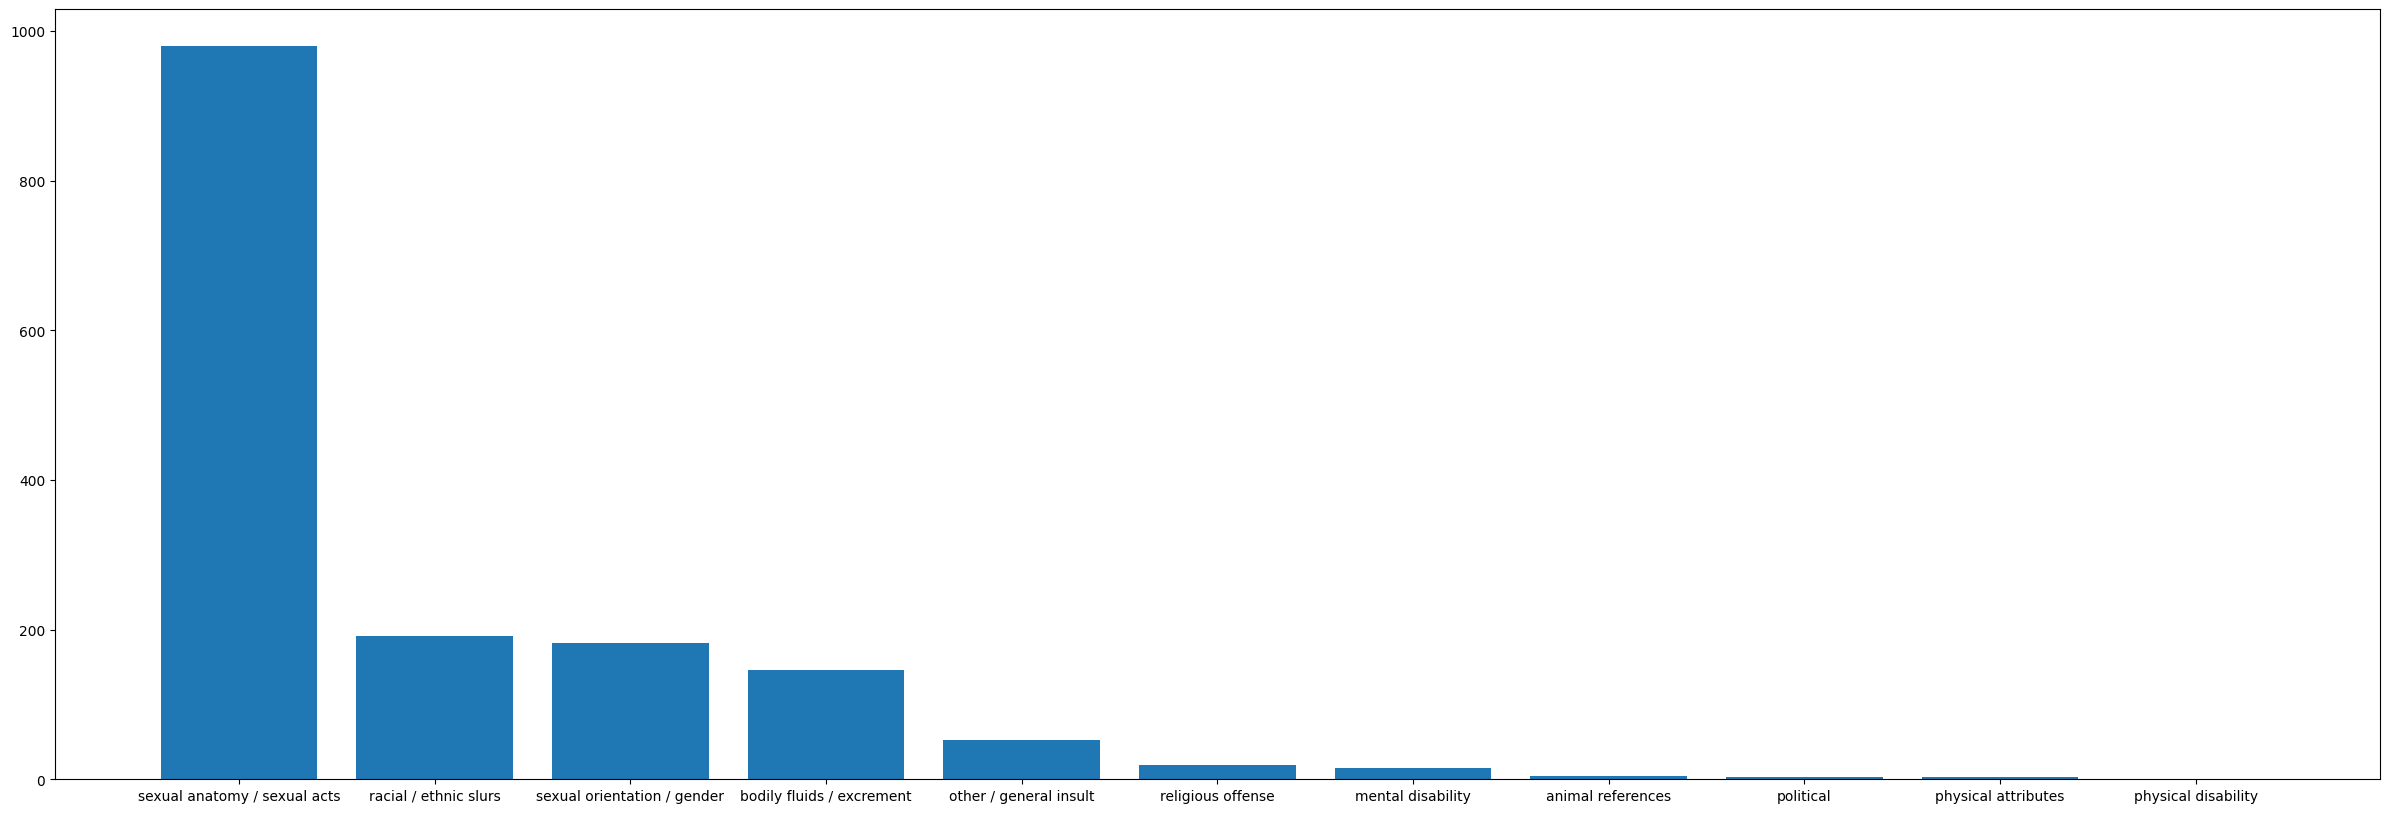

In [ ]:
plt.figure(figsize=(30, 10))
plt.bar(list(values.keys()), list(values.values()))

# Making a profanity checker out of this dataset

In [ ]:
profane_dist = {}
for category in categories:
    profane_dist[category] = 0 

In [ ]:
profane_dist

{'sexual anatomy / sexual acts': 0,
 'bodily fluids / excrement': 0,
 'sexual orientation / gender': 0,
 'racial / ethnic slurs': 0,
 'other / general insult': 0,
 'mental disability': 0,
 'political': 0,
 'animal references': 0,
 'physical attributes': 0,
 'religious offense': 0,
 'physical disability': 0}

['cocksucker', 'fucking', 'nigga', 'asshole', 'kid', 'diddler']
the profane words present in the text are:  ['cocksucker', 'fucking', 'nigga', 'asshole']
the average severity of the text is:  2.1


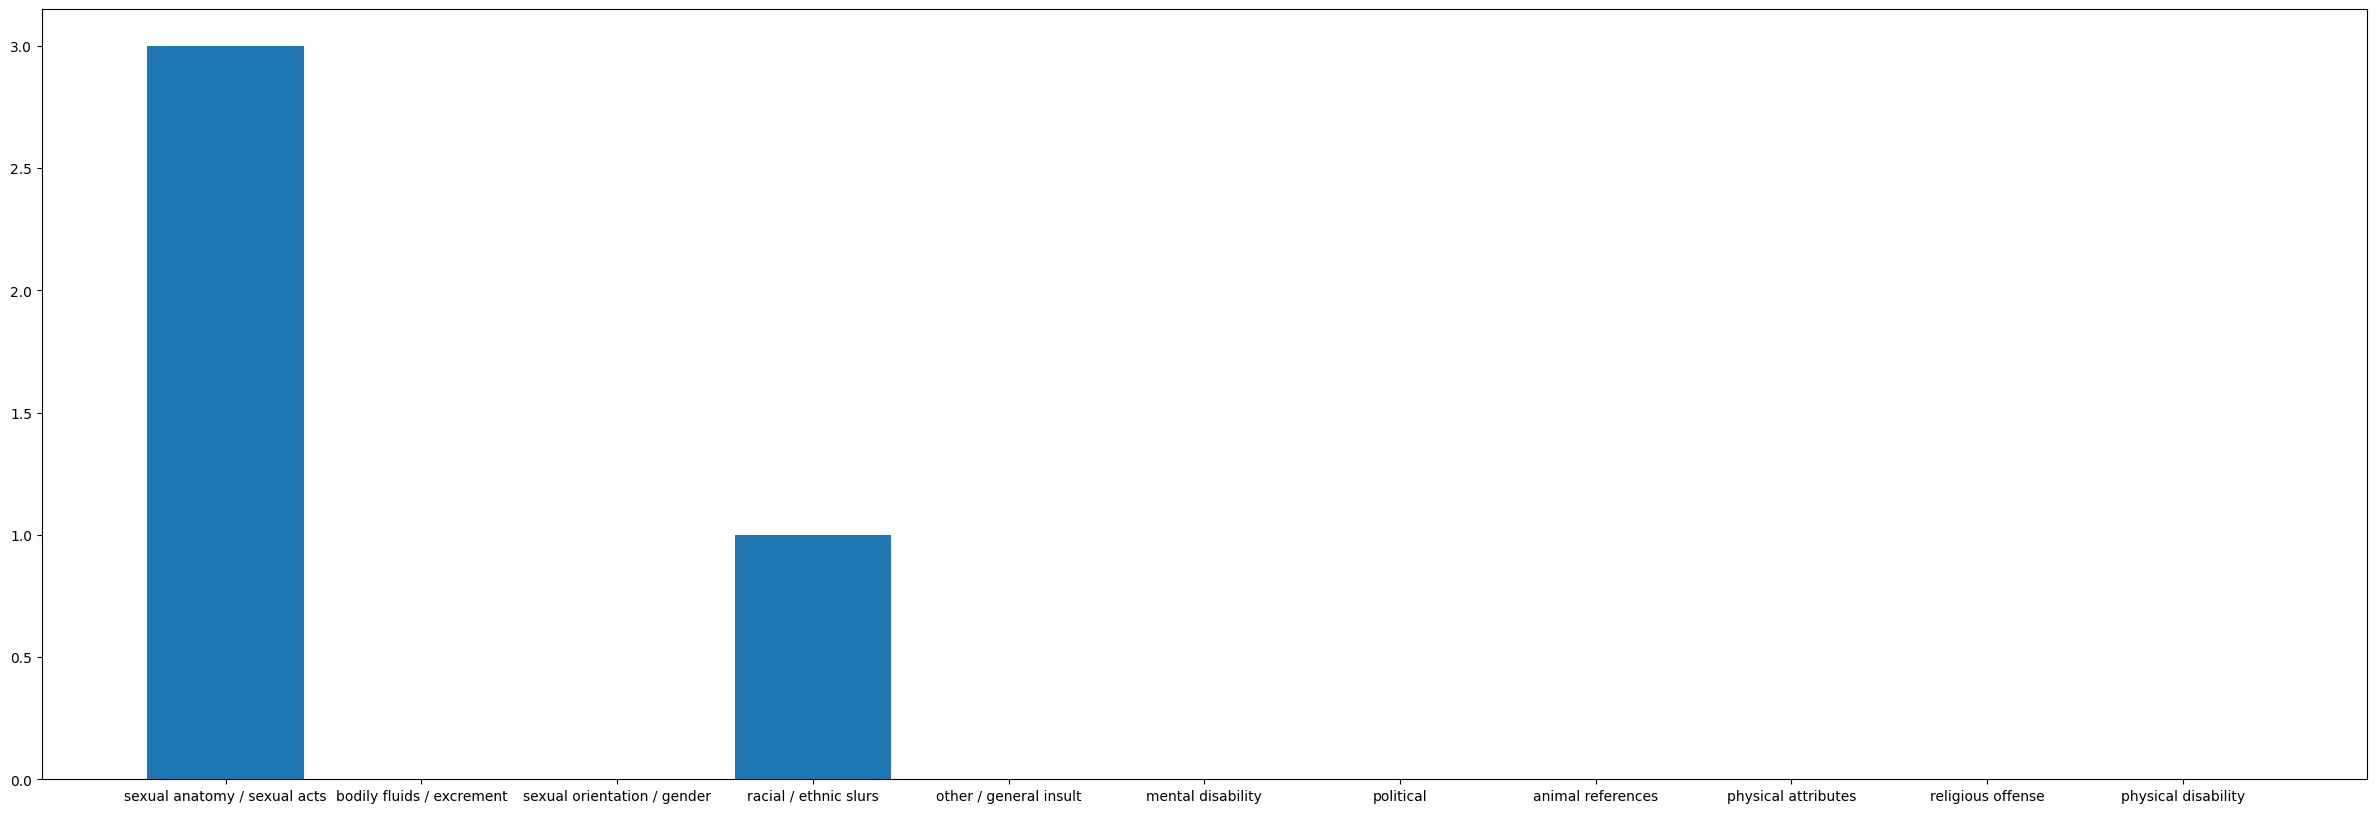

In [ ]:
#if a word from a string is in the input list of this dataset, the relevant outputs will be generated
profane_dist = {}
for category in categories:
    profane_dist[category] = 0
user_input = "cocksucker fucking nigga asshole "
user_input_words =  user_input.split()
print(user_input_words)
profane_words = []
for word in user_input_words:
    if word in list(dataset["text"]) or word in list(dataset["canonical_form_1"]) or word in list(dataset["canonical_form_2"]) or word in list(dataset["canonical_form_3"]):
        profane_words.append(word)
if len(profane_words) == 0:
    print("user input does not contain profane text")
else:
    severity = 0
    for word in profane_words:
        df = dataset.loc[dataset['text'] == word]
        category = df["category_1"].tolist()[0]
        profane_dist[category] = profane_dist[category] + 1
        severity = severity + df["severity_rating"].tolist()[0]
    severity = severity/len(profane_words)
    print("the profane words present in the text are: ", profane_words)
    plt.figure(figsize=(30, 10))
    plt.bar(list(profane_dist.keys()), list(profane_dist.values()))
    print("the average severity of the text is: ", severity)

# Making a categorizer

Step 1: Make The dataset according to categories using the dataset above, along with indic nltk, inltk and stanza
--footnote: dataset will contain words from all major Indian languages written in the english alphabet

Step 2: Train multilabel and binary classifiers